In [288]:
#importing the csv file
import sympy as sym
import numpy as np
import math
import pandas as pd
import io
import pystan
import matplotlib.pyplot as plt

from google.colab import files 
uploaded = files.upload()

Saving Copy of CS146 LBA data gathering (Spring 2021) (Responses) - Form Responses 1.csv to Copy of CS146 LBA data gathering (Spring 2021) (Responses) - Form Responses 1 (2).csv


In [338]:
data = pd.read_csv(io.BytesIO(uploaded['Copy of CS146 LBA data gathering (Spring 2021) (Responses) - Form Responses 1.csv']))

#converting some rental prices to integers
data['Average rental price near the grocery store'] = data['Average rental price near the grocery store'].astype(int)

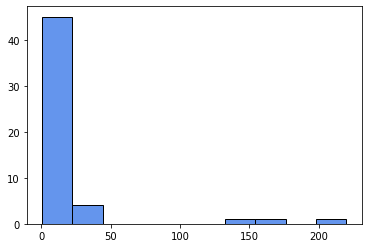

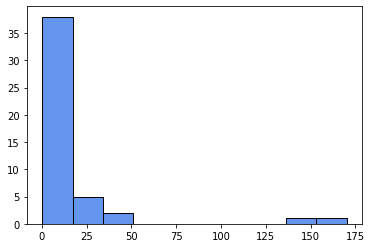

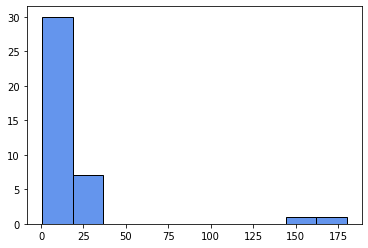

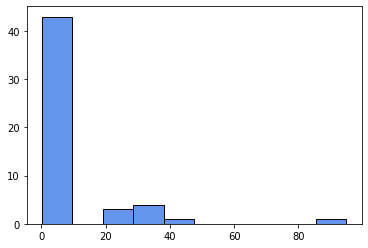

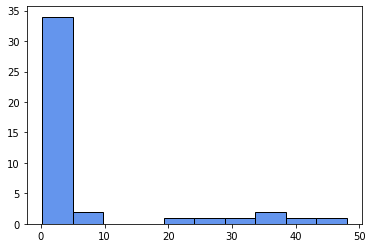

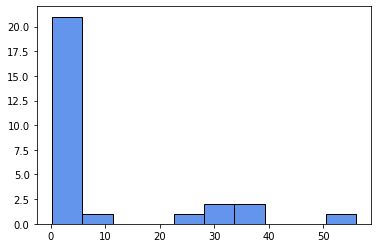

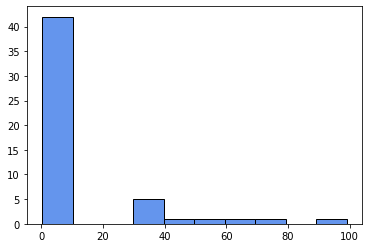

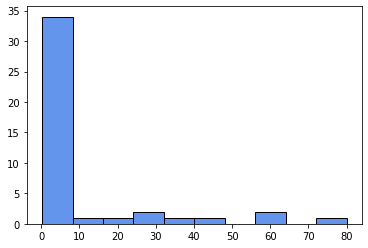

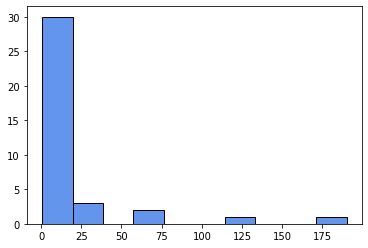

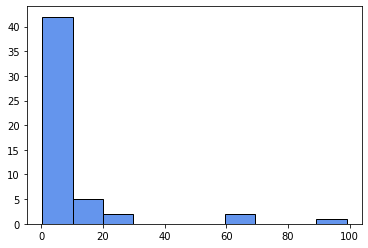

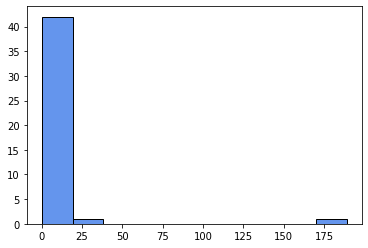

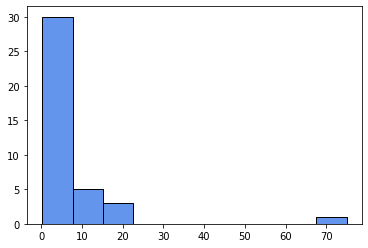

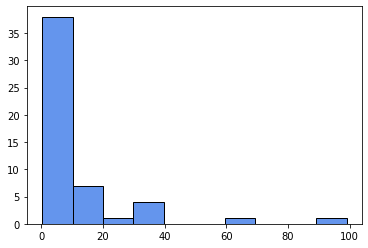

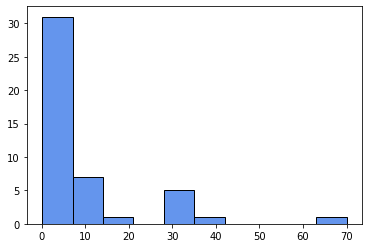

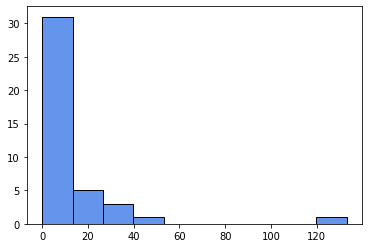

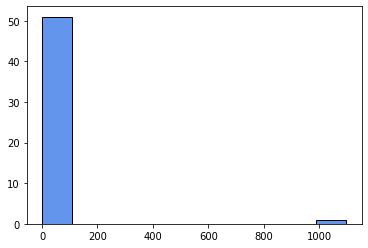

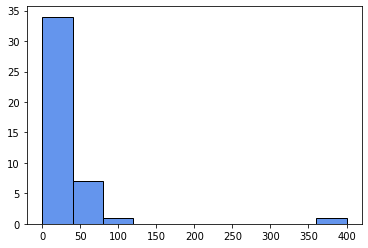

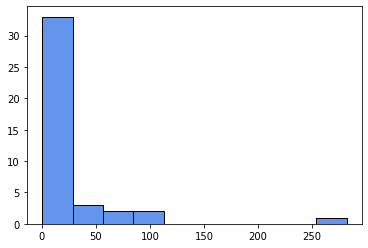

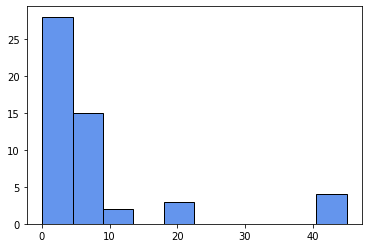

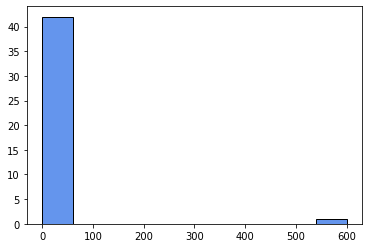

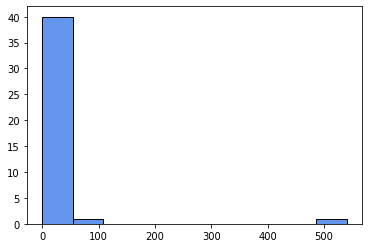

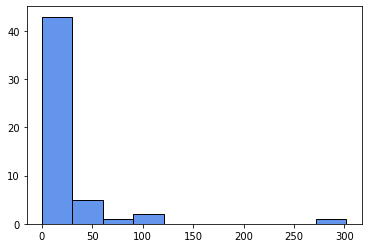

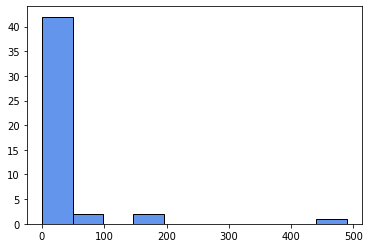

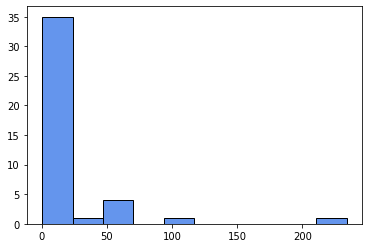

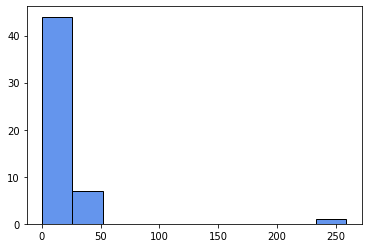

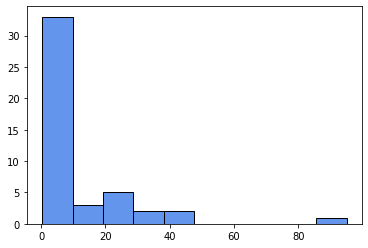

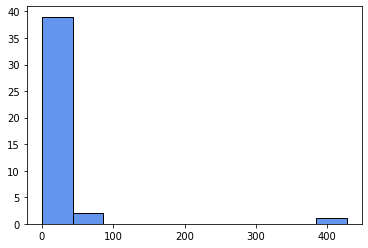

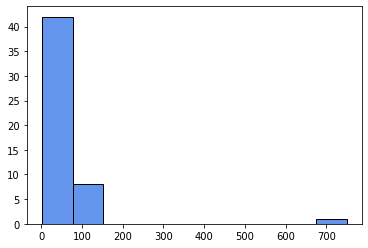

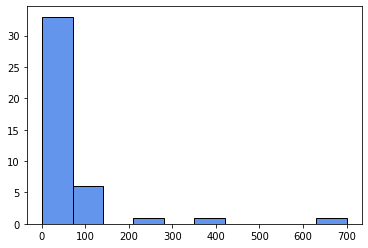

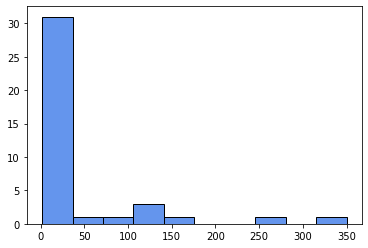

In [290]:
#plotting all products separately to identify incorrect data
for i in range(9,68,2):
  plt.hist(data.iloc[:,i], edgecolor='black', color='cornflowerblue')
  plt.show()

In [339]:
#eggs for 18$ per egg, tons of flour and other miracles

data_copy = data
#normalizing prices of each prouct so we could have prices per unit (1 kg, 1 liter and 1 count)
for i in range(len(data_copy)):
  for n in range(8, 67, 2):
    #checking if there is a value in a given cell
    if math.isnan(data_copy.iloc[i][n+1]) != True:
      #dividing each price by the quantity
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/data_copy.iloc[i][n], 2)
      #updating the quantity
      data_copy.iat[i, n] = 1
    if data_copy.iloc[i][4]=='CAD':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/1.25, 2)
    if data_copy.iloc[i][4]=='SEK':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/8.44, 2)
    if data_copy.iloc[i][4]=='UAH':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/27.76, 2)
    if data_copy.iloc[i][4]=='KES':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/109.65, 2)
    if data_copy.iloc[i][4]=='BRL':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/5.54, 2)
    if data_copy.iloc[i][4]=='BDT':
      data_copy.iat[i, n+1] = round(data_copy.iloc[i][n+1]/84.81, 2)

for i in range(len(data_copy)):
  if data_copy.iloc[i][4]=='CAD':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/1.25, 2)
  if data_copy.iloc[i][4]=='SEK':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/8.44, 2)
  if data_copy.iloc[i][4]=='UAH':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/27.76, 2)
  if data_copy.iloc[i][4]=='KES':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/109.65, 2)
  if data_copy.iloc[i][4]=='BRL':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/5.54, 2)
  if data_copy.iloc[i][4]=='BDT':
    data_copy.iat[i, 7] = round(data_copy.iloc[i][7]/84.81, 2)

#calculating mean prices for each product for each store
for i in range(len(data_copy)):
  for k in range(9, len(data_copy.columns), 6):
    data_copy.iat[i, k] = round(np.nanmean([data_copy.iloc[i][k],data_copy.iloc[i][k+2],data_copy.iloc[i][k+4]]),2)

#changing categorical data into integers
for i in range(len(data_copy)):
  if data_copy.iloc[i][6] == 'Budget (cheap)':
    data_copy.iat[i,6] = 1
  if data_copy.iloc[i][6] == 'Mid-range':
    data_copy.iat[i,6] = 2
  if data_copy.iloc[i][6] == 'Luxury (expensive)':
    data_copy.iat[i,6] = 3

#changing categorical data into integers
for i in range(len(data_copy)):
  if data_copy.iloc[i][3] == 'Ukraine':
    data_copy.iat[i,3] = 1
  if data_copy.iloc[i][3] == 'Bangladesh':
    data_copy.iat[i,3] = 2
  if data_copy.iloc[i][3] == 'Brazil':
    data_copy.iat[i,3] = 3
  if data_copy.iloc[i][3] == 'Kenya':
    data_copy.iat[i,3] = 4
  if data_copy.iloc[i][3] == 'USA':
    data_copy.iat[i,3] = 5
  if data_copy.iloc[i][3] == 'Canada':
    data_copy.iat[i,3] = 6
  if data_copy.iloc[i][3] == 'Sweden':
    data_copy.iat[i,3] = 7

#deleting/changing some final data points
data_copy = data_copy.drop(columns=data_copy.columns[[0,1,2,4,5,8,10,11,12,13,14,16,17,18,19,20,22,23,24,25,26,28,29,30,31,32,34,35,36,37,38,40,41,42,43,44,46,47,48,49,50,52,53,54,55,56,58,59,60,61,62,64,65,66,67]])
data_copy.iat[19, 0] = 5
data_copy.iat[30, 1] = 3
data_copy = data_copy.drop([43])
data_copy = data_copy.drop([44])
data_copy = data_copy.drop([17])
data_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


,Country where you (and the grocery store) are,Price perception of the store brand,Average rental price near the grocery store,Apples 1 price,Bananas 1 price,Product 1 price,Product 1 price.1,Product 1 price.2,Product 1 price.3,Product 1 price.4,Product 1 price.5,Product 1 price.6,Product 1 price.7
0,6,1,1160,2.84,2.33,9.67,3.17,1.60,8.71,2.24,10.85,0.38,18.97
1,6,1,1240,5.28,2.75,5.57,2.48,3.01,3.28,2.16,10.44,0.46,11.74
2,5,2,2996,2.76,2.02,6.61,4.78,5.26,5.49,1.53,9.28,0.20,8.48
3,5,3,3360,6.95,2.91,4.97,2.77,3.68,5.84,3.09,16.19,0.57,13.19
4,5,1,4000,3.06,1.52,3.50,1.53,1.45,5.79,1.20,9.67,0.32,9.31
5,5,3,4000,6.88,4.13,19.71,19.28,5.98,5.50,4.62,27.41,0.48,47.00
6,7,1,816,3.12,3.16,5.92,1.38,0.83,4.09,1.25,9.87,0.34,13.62
7,7,2,816,3.08,3.44,4.27,1.78,1.90,3.68,1.36,10.43,0.26,16.40
8,1,1,144,0.93,1.11,2.03,0.38,0.53,2.27,0.82,8.39,0.12,4.04
9,1,2,360,1.19,1.26,2.60,0.42,1.31,3.54,1.81,13.57,0.15,4.51


In [350]:
#setting names of the columns
data_copy.columns = ['Country where you (and the grocery store) are', 'Price perception of the store brand', 'Average rental price near the grocery store', 'Apples average','Bananas average', 'Tomatoes average','Potatoes average','Flour average','Rice average', 'Milk average','Butter average','Eggs average','Chicken average']

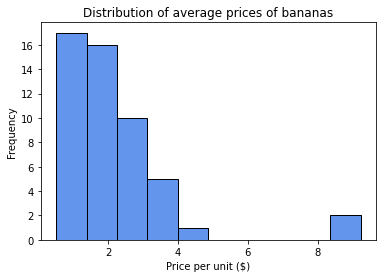

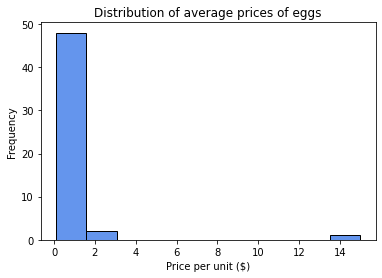

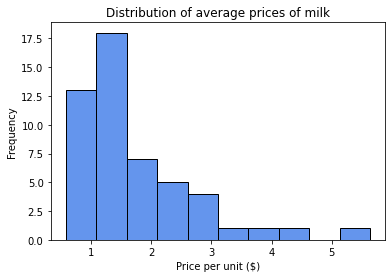

In [294]:
#plotting some of the data
plt.hist(data_copy['Bananas average'], edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Price per unit ($)')
plt.title('Distribution of average prices of bananas')
plt.show()
plt.hist(data_copy['Eggs average'], edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Price per unit ($)')
plt.title('Distribution of average prices of eggs')
plt.show()
plt.hist(data_copy['Milk average'], edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Price per unit ($)')
plt.title('Distribution of average prices of milk')
plt.show()

In [335]:
alpha, beta = sym.symbols('alpha, beta')

#here we will solve a system of equations
#we know the mean and standard deviatiations (estimated 10 and 5) - 
#from them we can identify appropriate alpha and beta
a = sym.Eq(alpha/beta,10)
b = sym.Eq((alpha/beta**2)**(1/2),5)
sym.solve([a, b],(alpha,beta))


[(4.00000000000000, 0.400000000000000)]

In [296]:
#We are going to use exponential distribution with a gamma prior
stan_code_exponential = """

data {  
    real L;
    int<lower=0> N_prices;      // length of the data (number of prices)
    real<lower=0> prices[N_prices];   // specific prices
    int<lower=0> N_types;               // number of brand types
    int<lower=0> store_types[N_prices];   // brand types for specific priices
    int<lower=0> N_countries;             // number of countries
    int<lower=0> countries[N_prices];     // countries for specific prices
}

parameters {
    //parameters of the model
    real<lower=0> base_price;   
    real<lower=0> sigma;  
    real<lower=0> location_multiplier[N_countries];
    real<lower=0> brand_multiplier[N_types];                  
}


model {
    //priors 
    sigma ~ gamma(1,1);
    base_price ~ gamma(4,0.4); 
    location_multiplier ~ normal(1,0.5);
    brand_multiplier ~ normal(1,0.5);

    //likelihood
    for (i in 1:N_prices) {
      prices[i] ~ normal(base_price*location_multiplier[countries[i]]*brand_multiplier[store_types[i]], sigma) T[L,];
    }

}
"""
stan_model = pystan.StanModel(model_code=stan_code_exponential)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_36beea06f726f8d493711f09a6bfc6af NOW.


In [336]:
#a function that, given results of the sampling from a model, print out information 
#such as posterior distribution of basic prices, their 98% confidence intervals and descriptive stats of different parameters
def summary(results):
  print(results)
  posterior_samples = results.extract()
  plt.hist(posterior_samples['base_price'], bins=50, density=True, edgecolor='black', color='cornflowerblue')
  plt.title('Sampled posterior probability density for base price')
  print(
    "Posterior 98% confidence interval for base price:",
    np.percentile(posterior_samples['base_price'], [1, 99]))
  plt.show()
  print('The basic average price for 1 unit', np.mean(posterior_samples['base_price'])) 

In [340]:
#Iterating through each product and adding results to a list
results = []
for i in range(3,13):
  stan_data = {
    'L': 0,
    'N_prices': len(data_copy),
    'prices': data_copy.iloc[:,i], 
    'N_types': 3,
    'store_types': data_copy.iloc[:, 1].tolist(),
    'N_countries': 7,
    'countries': data_copy.iloc[:,0].tolist()
  }

  results.append(stan_model.sampling(data=stan_data))

Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price                4.5    0.05   1.69    2.2   3.32   4.16    5.3   8.72    953    1.0
sigma                     1.6  5.0e-3   0.21   1.26   1.45   1.57   1.72   2.08   1746    1.0
location_multiplier[1]   0.32  4.6e-3   0.22   0.01   0.15   0.28   0.45   0.83   2320    1.0
location_multiplier[2]   0.89  9.2e-3   0.42   0.12   0.58   0.87   1.17   1.75   2096    1.0
location_multiplier[3]   0.61  5.7e-3   0.27   0.13   0.43    0.6   0.78    1.2   2240    1.0
location_multiplier[4]   0.94  6.9e-3   0.36   0.26   0.68   0.92   1.19    1.7   2802    1.0
location_multiplier[5]    1.4  6.3e-3    0.3   0.88   1.19   1.38    1.6   2.05   2269    1.0
location_multiplier[6]   1.34  8.8e-3   0.39   0.54   1.09 

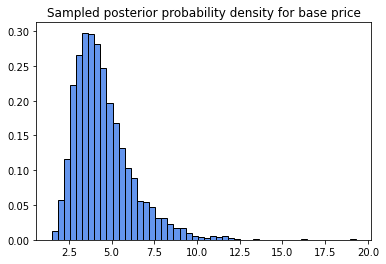

The basic average price for 1 unit 4.495605315052454
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               2.62    0.04   1.63   0.75   1.54   2.24    3.2   6.95   1634    1.0
sigma                    2.24  7.7e-3   0.31   1.69   2.02   2.23   2.44    2.9   1626    1.0
location_multiplier[1]   0.79  9.7e-3   0.43   0.08   0.46   0.76   1.08   1.75   2022    1.0
location_multiplier[2]   0.93    0.01   0.46    0.1    0.6   0.91   1.24   1.87   2104    1.0
location_multiplier[3]   0.77  8.4e-3   0.43   0.07   0.45   0.74   1.05   1.71   2642    1.0
location_multiplier[4]   0.93  9.4e-3   0.46   0.11   0.59   0.92   1.24   1.85   2352    1.0
location_multiplier[5]   0.97  8.9e-3   0.39   0.28   0.69   0.95   1.22   1.79   1913    1.0
locati

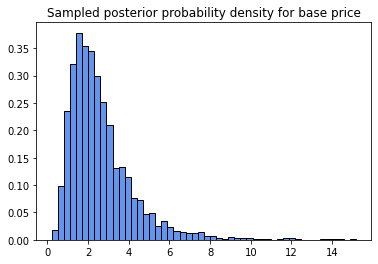

The basic average price for 1 unit 2.623013160652816
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               5.63    0.05   2.09    2.7   4.12   5.26   6.69  10.99   1457    1.0
sigma                    3.21    0.01    0.5   2.42   2.85   3.15    3.5   4.33   1237    1.0
location_multiplier[1]   0.69  6.8e-3   0.36   0.09   0.43   0.66   0.91   1.45   2771    1.0
location_multiplier[2]   0.86  9.5e-3   0.43   0.12   0.53   0.83   1.14   1.78   2080    1.0
location_multiplier[3]   0.46  6.6e-3   0.33   0.02   0.21    0.4   0.66   1.23   2406    1.0
location_multiplier[4]   0.73  8.8e-3   0.42   0.05    0.4   0.69   0.99   1.64   2226    1.0
location_multiplier[5]   1.33  7.6e-3   0.34   0.75    1.1   1.31   1.54   2.06   1974    1.0
locati

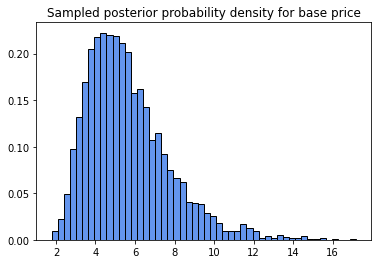

The basic average price for 1 unit 5.630722832000499
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               4.53    0.06    2.5   1.28   2.83   3.99   5.52  11.33   1689    1.0
sigma                    3.03  7.7e-3   0.37   2.38   2.77   3.01   3.26   3.84   2362    1.0
location_multiplier[1]   0.83    0.01   0.46   0.07   0.48   0.79   1.13   1.81   2031    1.0
location_multiplier[2]   0.97  8.4e-3   0.47   0.15   0.62   0.94    1.3   1.93   3126    1.0
location_multiplier[3]   0.88  9.3e-3   0.45   0.12   0.55   0.86   1.19   1.84   2342    1.0
location_multiplier[4]   0.97    0.01   0.48   0.12   0.63   0.95   1.29   1.95   1737    1.0
location_multiplier[5]   1.09  7.6e-3   0.39   0.39   0.81   1.06   1.34   1.91   2633    1.0
locati

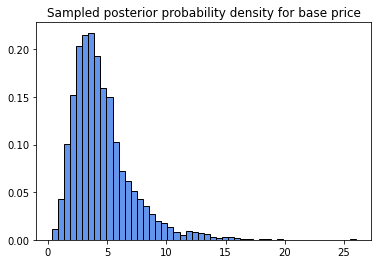

The basic average price for 1 unit 4.5288697106119855
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               2.46    0.04   1.63   0.58   1.38   2.05   3.08   6.52   1841    1.0
sigma                    3.14  7.6e-3   0.38   2.48   2.87   3.11   3.39   3.95   2489    1.0
location_multiplier[1]   0.81  8.2e-3   0.45   0.09   0.46   0.77   1.11    1.8   3038    1.0
location_multiplier[2]   0.95    0.01   0.47   0.12   0.61   0.95   1.27   1.93   1501    1.0
location_multiplier[3]    0.8  8.1e-3   0.44   0.09   0.47   0.76   1.09   1.72   2886    1.0
location_multiplier[4]   0.96  9.0e-3   0.45   0.16   0.64   0.93   1.27    1.9   2549    1.0
location_multiplier[5]    1.0  9.0e-3   0.43   0.22   0.67   0.97   1.29   1.89   2305    1.0
locat

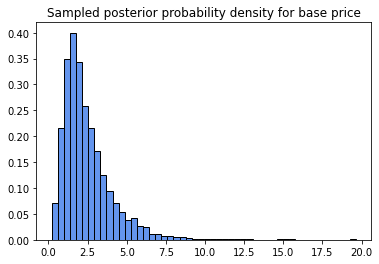

The basic average price for 1 unit 2.457907633668855
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               4.31    0.05   1.64   2.06   3.17   3.99   5.09   8.44   1143    1.0
sigma                    2.42  8.8e-3   0.35   1.87   2.17   2.37   2.61   3.23   1631    1.0
location_multiplier[1]   0.61  7.7e-3   0.33   0.07   0.37   0.58   0.83   1.31   1782    1.0
location_multiplier[2]   0.79  9.7e-3   0.41   0.08   0.49   0.77   1.05   1.66   1800    1.0
location_multiplier[3]   0.37  5.3e-3   0.27   0.02   0.16   0.32   0.53   0.99   2569    1.0
location_multiplier[4]   0.76  7.1e-3   0.39   0.11   0.46   0.73   1.01   1.59   2993    1.0
location_multiplier[5]    1.4  6.9e-3   0.32   0.84   1.18   1.39    1.6   2.07   2071    1.0
locati

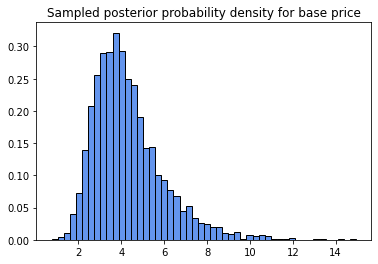

The basic average price for 1 unit 4.313112304722445
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               2.14    0.03   1.05    0.9   1.46   1.89   2.56   4.78   1377    1.0
sigma                    1.14  5.4e-3   0.19   0.84   1.01   1.11   1.25    1.6   1303    1.0
location_multiplier[1]   0.79  8.2e-3   0.37   0.12   0.53   0.77   1.03   1.55   2067    1.0
location_multiplier[2]    0.9  9.4e-3   0.42   0.09   0.61   0.88   1.17   1.77   1998    1.0
location_multiplier[3]   0.67  7.8e-3   0.37   0.05   0.39   0.64   0.91   1.46   2228    1.0
location_multiplier[4]   0.89  9.8e-3   0.43   0.11   0.58   0.87   1.17   1.77   1881    1.0
location_multiplier[5]   1.28  6.2e-3   0.32   0.71   1.05   1.26   1.48   1.97   2640    1.0
locati

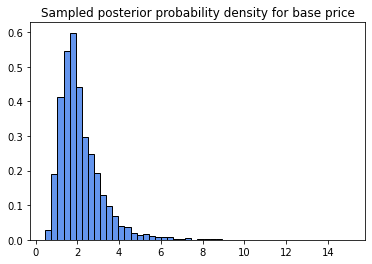

The basic average price for 1 unit 2.142594852072403
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               9.17    0.07   2.49   5.43   7.37   8.86  10.51  15.18   1459    1.0
sigma                    4.41    0.01   0.52   3.56   4.04   4.36   4.71   5.57   2241    1.0
location_multiplier[1]    1.0  5.9e-3   0.27   0.51   0.82   0.99   1.17   1.56   2058    1.0
location_multiplier[2]   1.15  6.7e-3   0.37   0.45   0.89   1.14    1.4    1.9   3060    1.0
location_multiplier[3]   0.89  6.1e-3   0.26    0.4   0.72   0.88   1.05   1.44   1824    1.0
location_multiplier[4]   1.12  8.4e-3   0.35   0.41   0.88   1.11   1.35   1.81   1771    1.0
location_multiplier[5]   1.39  5.9e-3   0.26   0.94   1.21   1.38   1.56   1.95   1893    1.0
locati

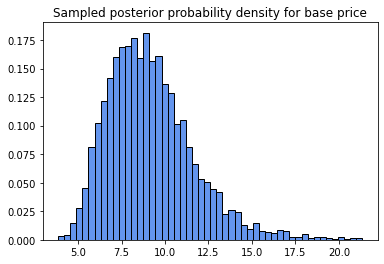

The basic average price for 1 unit 9.167500130588586
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               1.68    0.05   1.79    0.2    0.6    1.1   2.12   6.44   1539    1.0
sigma                    2.27  3.8e-3   0.23   1.88   2.11   2.25   2.41   2.76   3573    1.0
location_multiplier[1]   0.95    0.01   0.47   0.11   0.61   0.93   1.26   1.91   2157    1.0
location_multiplier[2]   0.99  9.5e-3   0.46   0.16   0.66   0.98    1.3   1.92   2341    1.0
location_multiplier[3]   0.88  9.1e-3   0.46    0.1   0.54   0.86    1.2   1.82   2551    1.0
location_multiplier[4]   0.98  9.6e-3   0.48   0.12   0.63   0.96   1.29   1.97   2465    1.0
location_multiplier[5]   0.39  6.4e-3   0.36 9.5e-3   0.11   0.28   0.57    1.3   3054    1.0
locati

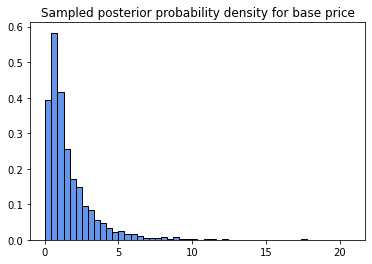

The basic average price for 1 unit 1.6770488455154797
Inference for Stan model: anon_model_36beea06f726f8d493711f09a6bfc6af.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price               9.54    0.09   3.11   4.73   7.29   9.12  11.24  16.89   1167    1.0
sigma                    6.71    0.02   0.98   5.09   6.02   6.58   7.27   8.97   1599    1.0
location_multiplier[1]   0.64  8.4e-3   0.37   0.05   0.36   0.61   0.88   1.44   1918    1.0
location_multiplier[2]   0.86  9.1e-3   0.44    0.1   0.53   0.84   1.15   1.78   2325    1.0
location_multiplier[3]   0.53  7.5e-3   0.36   0.03   0.25   0.47   0.76   1.35   2321    1.0
location_multiplier[4]   0.95  7.7e-3   0.43   0.17   0.64   0.93   1.24   1.81   3077    1.0
location_multiplier[5]   1.26  6.8e-3   0.32   0.71   1.03   1.23   1.45   1.94   2205    1.0
locat

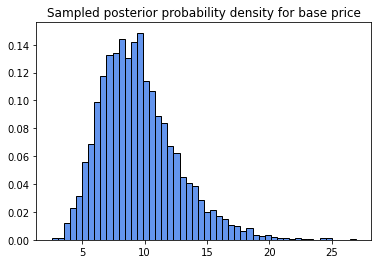

The basic average price for 1 unit 9.54038030476634


In [341]:
#printing out results for each product
for i in results:
  summary(i)

In [343]:
#creating a table where we will store means, their 95% confidence intervals, and lower/upper errors (to plot the error bars later)
table_prices = df = pd.DataFrame(index=range(10),columns=range(6))
for i in range(10):
  table_prices.iat[i,0] = np.mean(results[i]['base_price'])
  table_prices.iat[i,1] = np.percentile(results[i]['base_price'],2.5)
  table_prices.iat[i,2] =  np.percentile(results[i]['base_price'],97.5)
  table_prices.iat[i,3] = np.mean(results[i]['sigma'])
  table_prices.iat[i,4] = np.mean(results[i]['base_price'])- np.percentile(results[i]['base_price'],2.5)
  table_prices.iat[i,5] =  np.percentile(results[i]['base_price'],97.5)- np.mean(results[i]['base_price'])

table_prices.columns = ['Mean', '2.5 percentile', '97.5 percentile', 'Sigma', 'Lower Error', 'Upper Error']

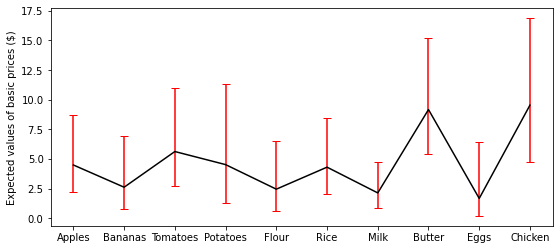

In [344]:
#plotting the expected values of basic average prices and ther 95% confidence intervals
plt.figure(figsize=(9,4))
plt.errorbar(np.linspace(0,9,10), table_prices['Mean'], [table_prices['Lower Error'].tolist(),table_prices['Upper Error'].tolist()], color='black',ecolor='red',capsize=4)
plt.ylabel('Expected values of basic prices ($)')
plt.xticks(np.arange(10), ('Apples','Bananas', 'Tomatoes','Potatoes','Flour','Rice', 'Milk','Butter','Eggs','Chicken'))
plt.show()

In [345]:
#adding values of brand and location multipliers to a list, so we could plot them for each product
brand_multipliers = [[],[],[]]
for i in results:
  brand_multipliers[0].append(np.mean(i['brand_multiplier[1]']))
  brand_multipliers[1].append(np.mean(i['brand_multiplier[2]']))
  brand_multipliers[2].append(np.mean(i['brand_multiplier[3]']))

location_multipliers = [[],[],[],[],[],[],[]]
for i in results:
  location_multipliers[0].append(np.mean(i['location_multiplier[1]']))
  location_multipliers[1].append(np.mean(i['location_multiplier[2]']))
  location_multipliers[2].append(np.mean(i['location_multiplier[3]']))
  location_multipliers[3].append(np.mean(i['location_multiplier[4]']))
  location_multipliers[4].append(np.mean(i['location_multiplier[5]']))
  location_multipliers[5].append(np.mean(i['location_multiplier[6]']))
  location_multipliers[6].append(np.mean(i['location_multiplier[7]']))

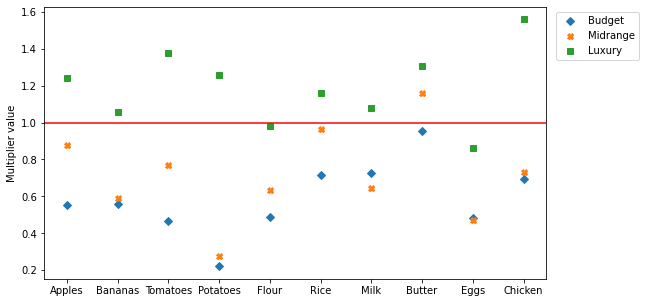

In [346]:
#plotting brand multipliers for each product
plt.figure(figsize=(9,5))
plt.plot(brand_multipliers[0], marker='D', linewidth=0, label='Budget')
plt.plot(brand_multipliers[1], marker='X', linewidth=0, label='Midrange')
plt.plot(brand_multipliers[2], marker='s', linewidth=0, label='Luxury')
plt.xticks(np.arange(10), ('Apples','Bananas', 'Tomatoes','Potatoes','Flour','Rice', 'Milk','Butter','Eggs','Chicken'))
plt.ylabel('Multiplier value')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.axhline(1, color='red')
plt.show()

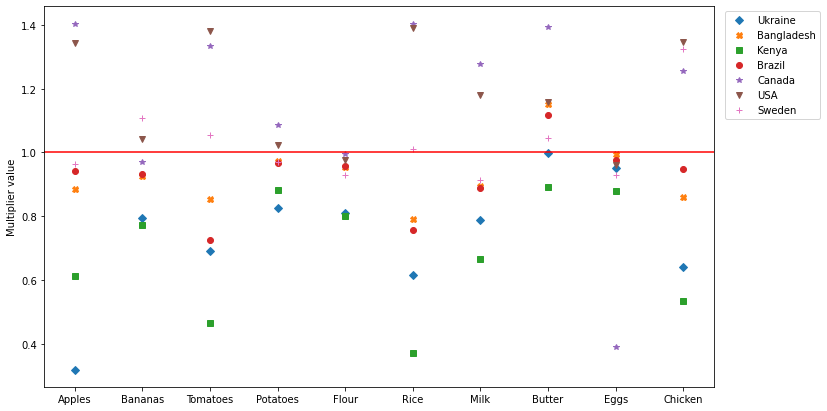

In [347]:
#plotting location multipliers for each product
plt.figure(figsize=(12,7))
plt.plot(location_multipliers[0], marker='D', linewidth=0, label='Ukraine')
plt.plot(location_multipliers[1], marker='X', linewidth=0, label='Bangladesh')
plt.plot(location_multipliers[2], marker='s', linewidth=0, label='Kenya')
plt.plot(location_multipliers[3], marker='o', linewidth=0, label='Brazil')
plt.plot(location_multipliers[4], marker='*', linewidth=0, label='Canada')
plt.plot(location_multipliers[5], marker='v', linewidth=0, label='USA')
plt.plot(location_multipliers[6], marker='+', linewidth=0, label='Sweden')
plt.ylabel('Multiplier value')
plt.xticks(np.arange(10), ('Apples','Bananas', 'Tomatoes','Potatoes','Flour','Rice', 'Milk','Butter','Eggs','Chicken'))
plt.legend(bbox_to_anchor=(1.01, 1))
plt.axhline(1, color='red')

In [348]:
table_prices1 = df = pd.DataFrame(index=range(10),columns=range(2))
for i in range(10):
  table_prices1.iat[i,0] = round(np.mean(data_copy.iloc[:,3+i]),2)
  table_prices1.iat[i,1] = round(np.mean(results[i]['sigma']),2)

table_prices1.columns = ['Average price', 'Sigma']
table_prices2 = np.transpose(table_prices1)
table_prices2.columns = ['Apples','Bananas', 'Tomatoes','Potatoes','Flour','Rice', 'Milk','Butter','Eggs','Chicken']
table_prices2

,Apples,Bananas,Tomatoes,Potatoes,Flour,Rice,Milk,Butter,Eggs,Chicken
Average price,4.02,2.2,4.98,2.61,2.52,4.44,1.77,12.5,0.7,9.84
Sigma,1.6,2.24,3.21,3.03,3.14,2.42,1.14,4.41,2.27,6.71


In [351]:
data_copy.corr()

,Average rental price near the grocery store,Apples average,Bananas average,Tomatoes average,Potatoes average,Flour average,Rice average,Milk average,Butter average,Eggs average,Chicken average
Average rental price near the grocery store,1.000000,0.601285,0.268163,0.529776,0.448911,0.368646,0.481776,0.392645,0.347500,-0.084389,0.430481
Apples average,0.601285,1.000000,0.596921,0.593597,0.447564,0.549868,0.559639,0.449513,0.343640,0.024995,0.483785
Bananas average,0.268163,0.596921,1.000000,0.476664,0.412347,0.638113,0.601690,0.524308,0.163584,-0.056363,0.429502
Tomatoes average,0.529776,0.593597,0.476664,1.000000,0.781936,0.523433,0.639089,0.484200,0.507626,-0.065019,0.825344
Potatoes average,0.448911,0.447564,0.412347,0.781936,1.000000,0.433218,0.338768,0.579956,0.554521,-0.062001,0.810295
Flour average,0.368646,0.549868,0.638113,0.523433,0.433218,1.000000,0.491398,0.435781,0.393385,-0.057482,0.348390
Rice average,0.481776,0.559639,0.601690,0.639089,0.338768,0.491398,1.000000,0.452898,0.410553,0.036729,0.498376
Milk average,0.392645,0.449513,0.524308,0.484200,0.579956,0.435781,0.452898,1.000000,0.266405,-0.060116,0.519922
Butter average,0.347500,0.343640,0.163584,0.507626,0.554521,0.393385,0.410553,0.266405,1.000000,-0.075195,0.457508
Eggs average,-0.084389,0.024995,-0.056363,-0.065019,-0.062001,-0.057482,0.036729,-0.060116,-0.075195,1.000000,-0.077946
